# Importando bibliotecas

In [34]:
#Importação
import pandas as pd
import numpy as np

#Visualização
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso
import plotly.express as px

#biblioteca de processamento
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


#Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importando arquivo csv e primeiro contato com os dados

## Importando arquivo csv

In [3]:
df = pd.read_csv("data/data.csv")

## Primeiro contato com os dados

In [5]:
#primeira visualização dos dados
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [58]:
#Quantidade de linhas e colunas
df.shape

(569, 33)

In [6]:
#Informação dos tipos de dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
#Visualizando todas as colunas
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
#análise estátistica básica de cada variaével numérica
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### **Explicação dos atributos**

Os atributos são divididos em três grupos: Mean, SE e Worst.

Mean: média de todas as células;

SE: Standard Error (erro padrão de todas as células);

Worst: média dos três piores valores medidos das células. Na verdade, é considerado "pior" porque são medidas indicativas de células não saudáveis; na realidade o "pior" significa os maiores valores medidos para raio, perímetro, textura etc.

### **Cada grupo tem 10 atributos:**

*   radius (raio da célula)
*   texture (textura da célula - medida pelo desvio padrão de escalas de cinza, que ajudam a indicar se a célula é   *   saudável ou não)
*   perimeter (perímetro)
*   area (área)
*   smoothness (variação local em comprimentos de raio)
*   compactness (campactude = perimetro²/area - 1)
*   concavity (gravidade das porções côncavas das células)
*   concave points (número de porções côncavas no contorno da célula),
*   symmetry (simetria)
*   fractal_dimension (dimensão fractal).

In [8]:
#Verificando a variavel dependente
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

<AxesSubplot:>

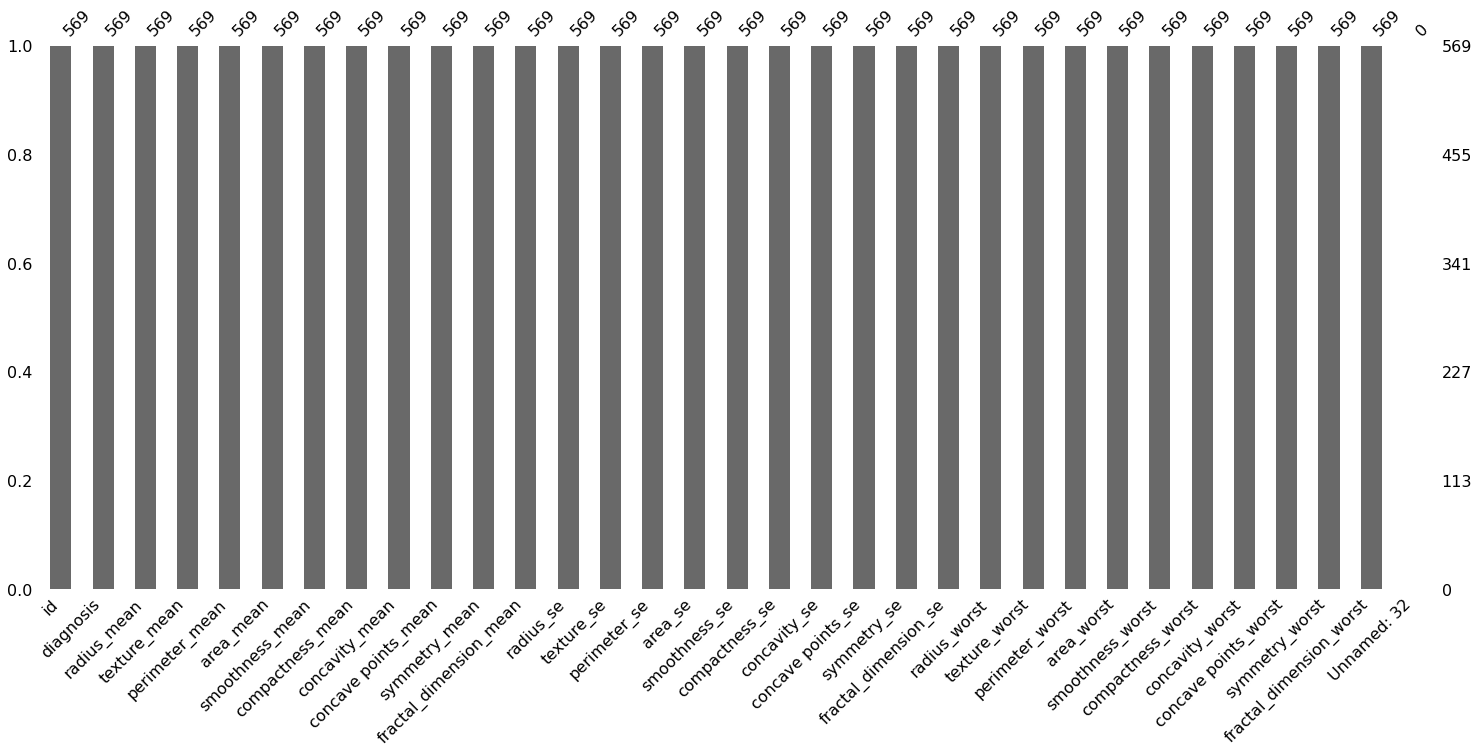

In [9]:
#Visualizando os dados faltantes
mso.bar(df)

### Correlação entre as variaveis 

<AxesSubplot:>

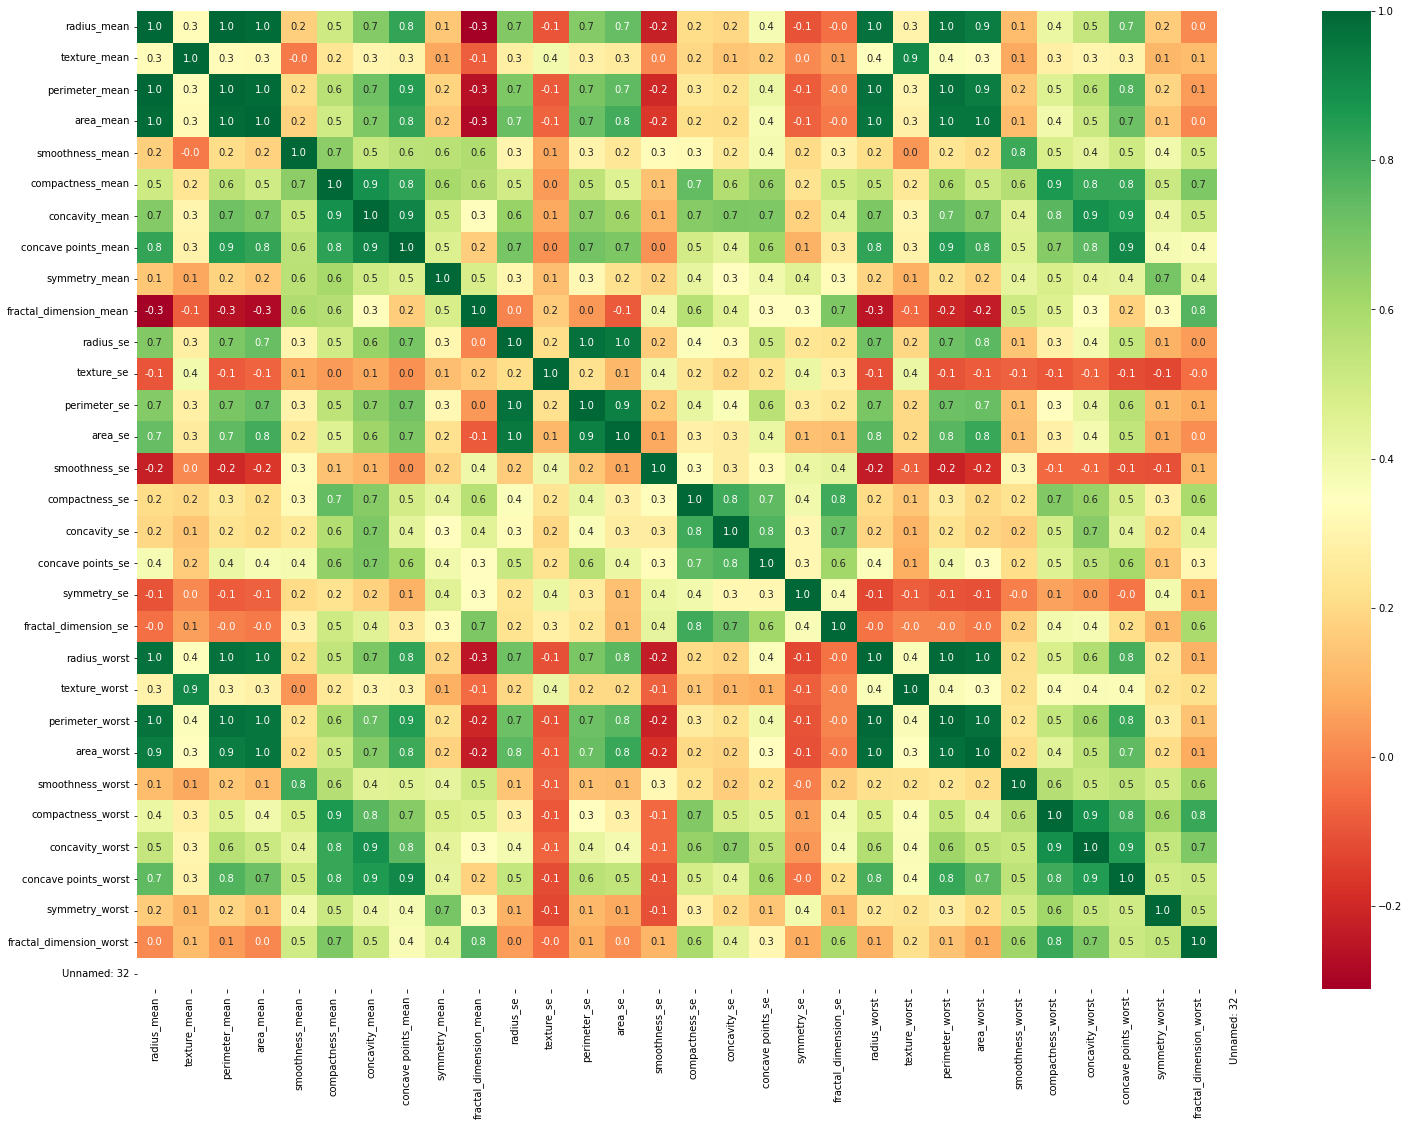

In [18]:
# Mostrar mapa de calor 
f,ax = plt.subplots(figsize=(25, 18))

sns.heatmap(df.iloc[:,1:].corr(), annot=True, fmt= '.1f', cmap ='RdYlGn')

existe muita correlação forte 

## Seleção das features

### **Vamos separar em 3 grupos de arquivos.**

*   somente a média (mean)
*   somente o erro padrão (SE)
*   somente os piores valores (worst)

In [12]:
df_mean = df[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

df_se = df[['id', 'diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 
            'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
            'concave points_se', 'symmetry_se','fractal_dimension_se']]

df_worst = df[['id', 'diagnosis', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 
       'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']]

### Iremos focar nossa análise apenas nos valores médios

In [19]:
#Visualização
df_mean.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


<AxesSubplot:>

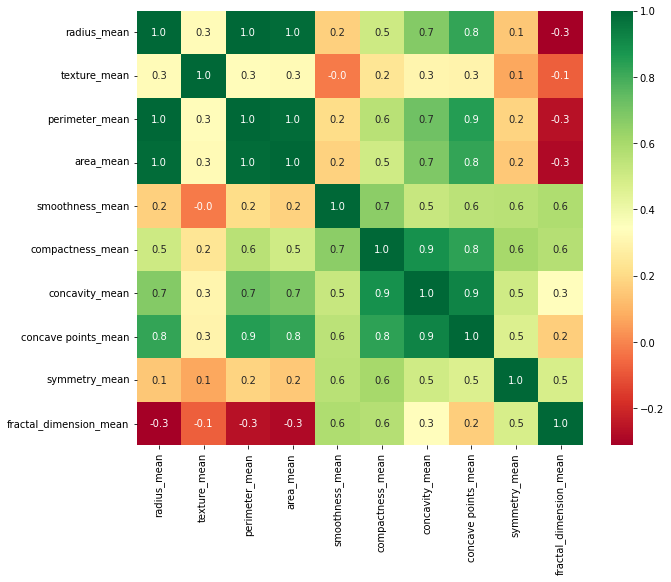

In [13]:
# Mostrar mapa de calor 
f,ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df_mean.iloc[:,1:].corr(), annot=True, fmt= '.1f', cmap ='RdYlGn')

In [68]:
# profile = pandas_profiling.ProfileReport(df)
# # profile.to_file(output_file="report.html")

In [20]:
df_mean.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


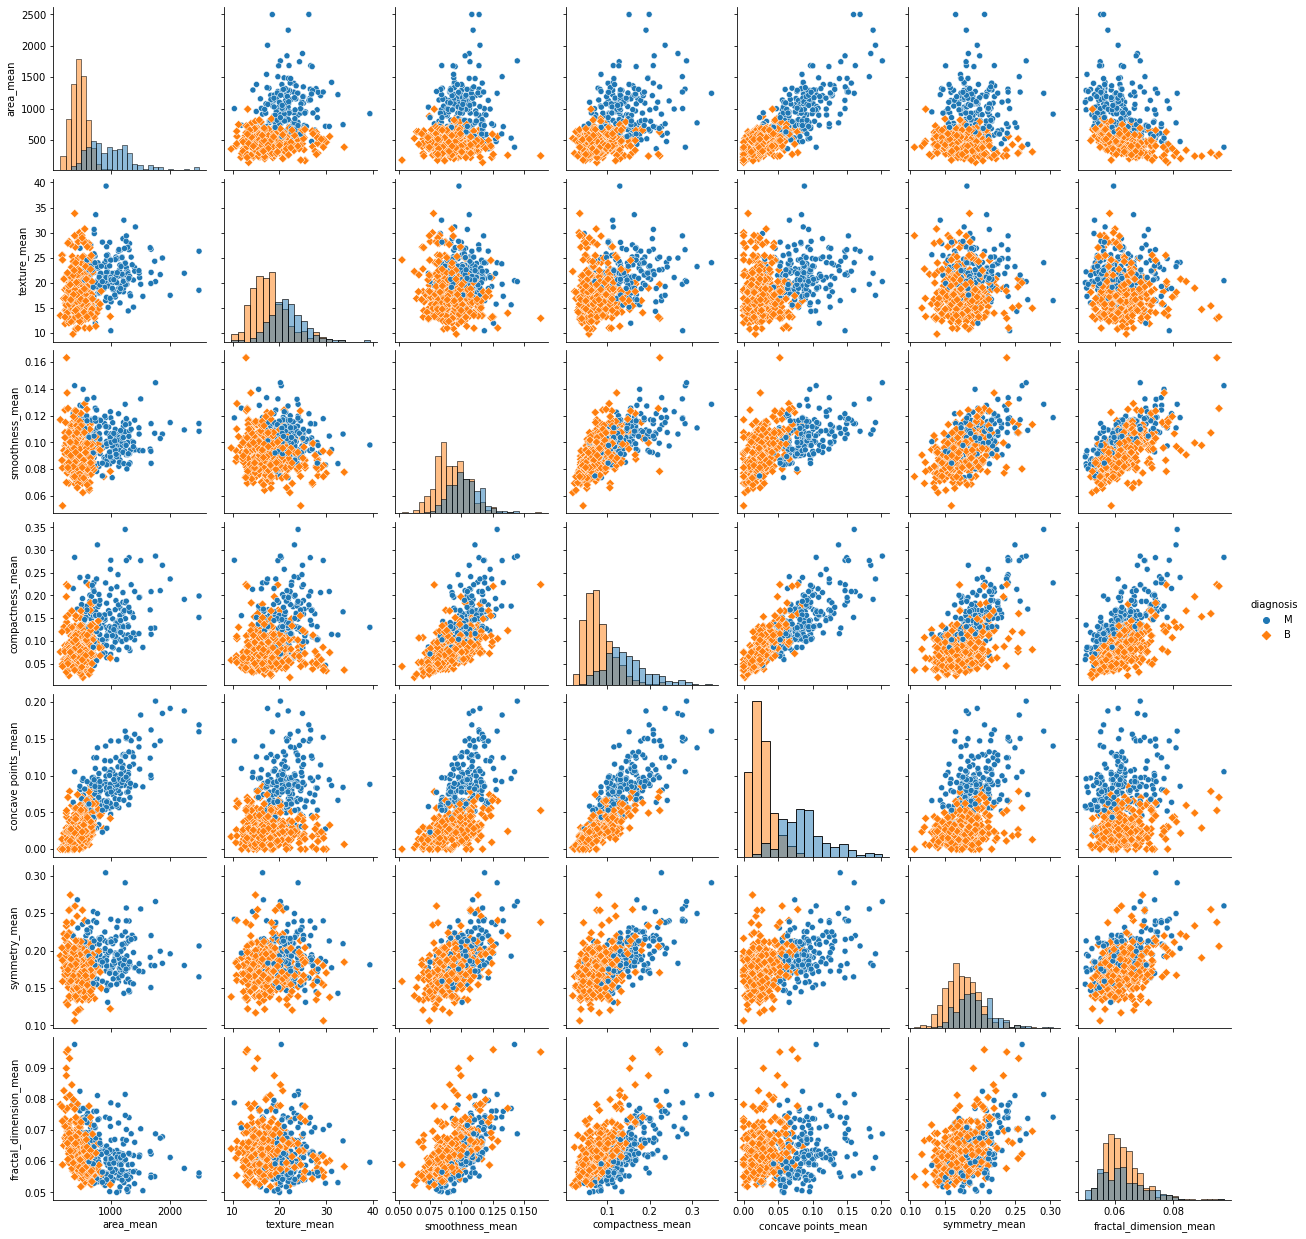

In [21]:
# Mostrar correlação entre classes e atributos 'mean'
sns.pairplot(df_mean, 
            kind="scatter", 
            diag_kind="hist", 
            hue="diagnosis" ,  
            markers=["o", "D"], 
            vars=["area_mean", "texture_mean", "smoothness_mean", "compactness_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"] ) 
plt.show()

In [22]:
# visualização da distribuição do diagnóstico 
df_mean["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [23]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


# Treinando modelo 

## Preparando dados 

Para o processo de machine learning, iremos transformar a variavel categórica em numérica

In [24]:
df_mean.replace(["B", "M"], [0, 1], inplace = True)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_632\1330048698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean.replace(["B", "M"], [0, 1], inplace = True)


In [25]:
# X estão as nossas variaveis independentes 
X = df_mean.drop(["id", "diagnosis"], axis=1)
# y está a nossa variavel dependente, diagnosis
y = df_mean.diagnosis 

In [57]:
# Separando dados pra treino e dados para teste
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.3)

## Selecionando modelos de classificação

In [113]:
models = {
    
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "xgboost": xgb.XGBClassifier()
}

#passando os modelos inicialmente sem parametros

## Treintando e testando os modelos selecionados

In [114]:
#Criando uma função que treina e testa os modelos selecionados acima
def fit_and_score(models, X_train, X_test, y_train, y_test):

    np.random.seed(42)

    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [115]:
#Aplicando modelos
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train= y_train, y_test= y_test)

model_scores

c:\Users\Usuário\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'KNN': 0.8888888888888888,
 'LogisticRegression': 0.9239766081871345,
 'RandomForest': 0.9415204678362573,
 'DecisionTree': 0.9298245614035088,
 'xgboost': 0.9473684210526315}

In [116]:
#Criando um dataframe com os retornos de cada modelo

com_model = pd.DataFrame(list(model_scores.items()),
                         columns = ["Model", "Accuracy"])

com_model

,Model,Accuracy
0,KNN,0.888889
1,LogisticRegression,0.923977
2,RandomForest,0.941520
3,DecisionTree,0.929825
4,xgboost,0.947368


In [118]:
fig = px.bar(com_model, 
             x = "Model", 
             y = "Accuracy",
             range_y = [0.85, 1],
             title = "Accuracy of each model")
fig.show()

# Melhorando modelos selecionando os melhores parametros

## **KNN Classifier**

In [83]:
te_acc = []
#setando o valor de k entre 1 e 15
k_set = range(1,15)

for n_neighbors in k_set:

  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test) #aplica x_test no modelo
  
  accuracy_score(y_test, y_pred)

  te_acc.append(accuracy_score(y_test, y_pred)) #compara y_test com y_pred
    
melhor_k_knn =np.argmax(te_acc)

print('Melhor k nos testes: ', k_set[melhor_k_knn]) #melhor k do treinamento normal + teste

Melhor k nos testes:  1


In [101]:
te_acc[melhor_k_knn]

0.9473684210526315

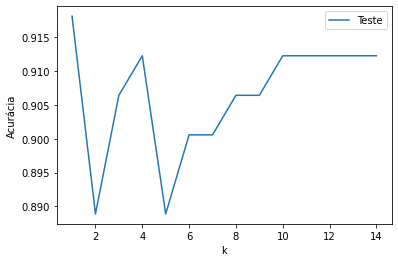

In [86]:
plt.plot(k_set,te_acc, label='Teste')
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend()

plt.show()

## **Random Forest Classifier**

In [87]:
te_acc = []
k_set = range(1,15)

for depth in k_set:
  rfc = RandomForestClassifier(max_depth=depth, random_state = 123)
  
  rfc.fit(X_train, y_train)
  y_pred = rfc.predict(X_test) #aplica x_test no modelo
  
  accuracy_score(y_test, y_pred)

  te_acc.append(accuracy_score(y_test, y_pred)) #compara y_test com y_pred
    
melhor_k_RFC =np.argmax(te_acc)

print('Melhor parametro max_depth nos testes: ', k_set[melhor_k_RFC]) #melhor k do treinamento normal + teste

Melhor parametro max_depth nos testes:  7


In [88]:
te_acc[melhor_k_RFC]

0.9532163742690059

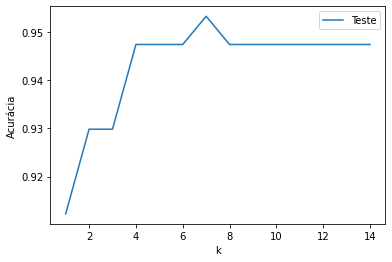

In [89]:
plt.plot(k_set, te_acc, label='Teste')
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend()

plt.show()

## **Decision Tree Classifier**

In [90]:
te_acc = []
k_set = range(1,15)

for depth in k_set:
  dtc = DecisionTreeClassifier(max_depth=depth, random_state = 123)
  
  dtc.fit(X_train, y_train)
  y_pred = dtc.predict(X_test) #aplica x_test no modelo
  
  accuracy_score(y_test, y_pred)

  te_acc.append(accuracy_score(y_test, y_pred)) #compara y_test com y_pred
    
melhor_k_DTC =np.argmax(te_acc)

print('Melhor parametro max_depth nos testes: ', k_set[melhor_k_DTC]) #melhor k do treinamento normal + teste

Melhor parametro max_depth nos testes:  4


In [91]:
te_acc[melhor_k_DTC]

0.9298245614035088

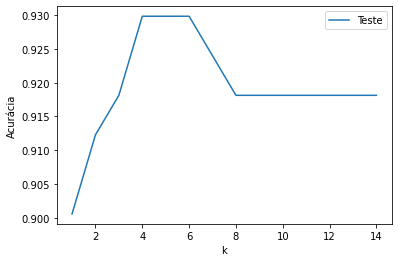

In [92]:
plt.plot(k_set, te_acc, label='Teste')
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend()

plt.show()

## **XGBoost**

In [93]:
te_acc = []
k_set = range(1,15)

for depth in k_set:
  xgbC = xgb.XGBClassifier(max_depth=depth, random_state = 123)
  xgbC.fit(X_train, y_train)
  y_pred = xgbC.predict(X_test) #aplica x_test no modelo
  
  accuracy_score(y_test, y_pred)

  te_acc.append(accuracy_score(y_test, y_pred)) #compara y_test com y_pred
    
melhor_k_XGB =np.argmax(te_acc)

print('Melhor parametro max_depth nos testes: ', k_set[melhor_k_XGB]) #melhor k do treinamento normal + teste

Melhor parametro max_depth nos testes:  7


In [94]:
te_acc[melhor_k_XGB]

0.9707602339181286

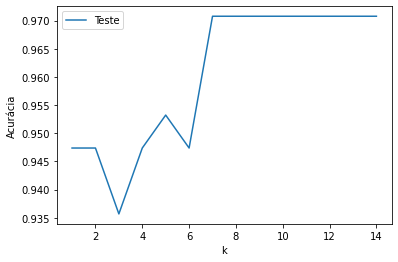

In [95]:
plt.plot(k_set, te_acc, label='Teste')
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend()

plt.show()

## Melhorias nos modelos de ML

In [119]:
models = {
    
    "KNN": KNeighborsClassifier(n_neighbors= melhor_k_knn+1),
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(max_depth= melhor_k_RFC + 1, random_state = 123),
    "DecisionTree": DecisionTreeClassifier(max_depth= melhor_k_DTC + 1, random_state = 123),
    "xgboost": xgb.XGBClassifier(max_depth = melhor_k_XGB + 1, random_state = 123)
}

In [120]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train= y_train, y_test= y_test)

model_scores

c:\Users\Usuário\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'KNN': 0.9181286549707602,
 'LogisticRegression': 0.9239766081871345,
 'RandomForest': 0.9532163742690059,
 'DecisionTree': 0.9298245614035088,
 'xgboost': 0.9707602339181286}

In [121]:
#Criando um dataframe com os retornos de cada modelo

com_model = pd.DataFrame(list(model_scores.items()),
                         columns = ["Model", "Accuracy"])

com_model

,Model,Accuracy
0,KNN,0.918129
1,LogisticRegression,0.923977
2,RandomForest,0.953216
3,DecisionTree,0.929825
4,xgboost,0.970760


In [122]:
fig = px.bar(com_model, 
             x = "Model", 
             y = "Accuracy",
             range_y = [0.9, 1 ],
             title = "Accuracy of each model")
fig.show()

## Selecionando o modelo de maior accuaracy - XGBOOST

In [123]:
xgbC = xgb.XGBClassifier(max_depth = melhor_k_XGB + 1, random_state = 123)

In [124]:
xgbC.fit(X_train, y_train)
y_pred = xgbC.predict(X_test)

In [125]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       109
           1       0.98      0.94      0.96        62

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [126]:
#Matriz de confusão
print(confusion_matrix(y_test, y_pred))

[[108   1]
 [  4  58]]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

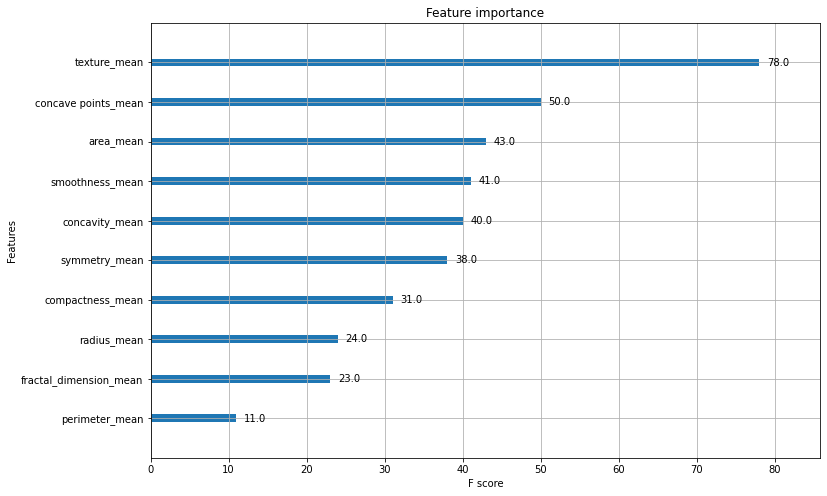

In [127]:
#features mais relevantes
fig, ax = plt.subplots(figsize = (12,8))

xgb.plot_importance(xgbC, ax=ax)

<AxesSubplot:>

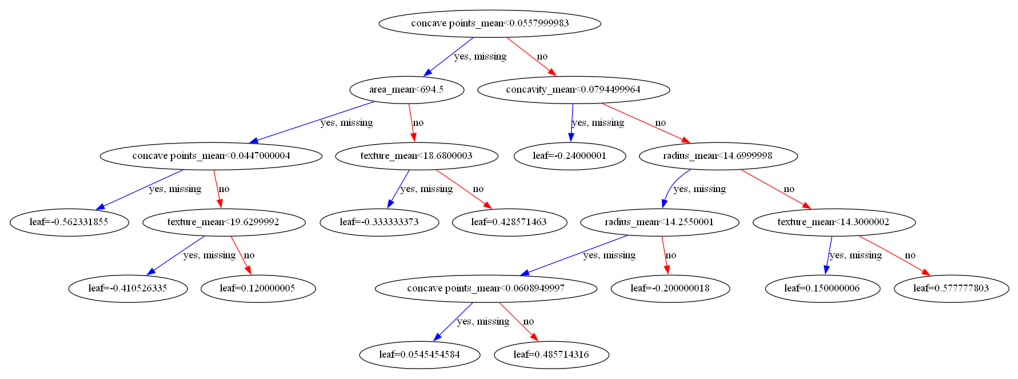

In [128]:
fig, ax = plt.subplots(figsize = (18,25))
xgb.plot_tree(xgbC, ax=ax, )